## Leading Score Assignment
Predict probability of a lead getting converted.

## 1. Import data

In [684]:
# Disable warning
import warnings
warnings.filterwarnings('ignore')

In [685]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [686]:
# Importing all datasets
lead_data = pd.read_csv("Leads.csv")

## 2. Inspect DataFrame

In [687]:
# Let's see the head of the dataset
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [688]:
# Dimensions of the dataframe
lead_data.shape

(9240, 37)

In [689]:
# Statistical aspects
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [690]:
# Type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 3. Data preparation

### Convert dummy variables (Yes/No) to (1/0)

In [691]:
# List of variables to map
varlist =  [
    'Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
    'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'
]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [692]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[[
    'Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 
    'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
    'Last Notable Activity'
]], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)
lead_data.head()
lead_data.shape

(9240, 207)

### Dropping the repeated variables

In [693]:
# We have created dummies for the below variables, so we can drop them
lead_data = lead_data.drop([
    'Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 
    'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
    'Last Notable Activity'
], 1)
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Remove unbalanced 1's or 0's columns from dummy variables

In [694]:
columns_to_check = ['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone', 'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'Last Activity_View in browser link Clicked', 'Last Activity_Visited Booth in Tradeshow', 'Country_Australia', 'Country_Bahrain', 'Country_Bangladesh', 'Country_Belgium', 'Country_Canada', 'Country_China', 'Country_Denmark', 'Country_France', 'Country_Germany', 'Country_Ghana', 'Country_Hong Kong', 'Country_India', 'Country_Indonesia', 'Country_Italy', 'Country_Kenya', 'Country_Kuwait', 'Country_Liberia', 'Country_Malaysia', 'Country_Netherlands', 'Country_Nigeria', 'Country_Oman', 'Country_Philippines', 'Country_Qatar', 'Country_Russia', 'Country_Saudi Arabia', 'Country_Singapore', 'Country_South Africa', 'Country_Sri Lanka', 'Country_Sweden', 'Country_Switzerland', 'Country_Tanzania', 'Country_Uganda', 'Country_United Arab Emirates', 'Country_United Kingdom', 'Country_United States', 'Country_Vietnam', 'Country_unknown', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management', 'Specialization_Rural and Agribusiness', 'Specialization_Select', 'Specialization_Services Excellence', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism', 'How did you hear about X Education_Email', 'How did you hear about X Education_Multiple Sources', 'How did you hear about X Education_Online Search', 'How did you hear about X Education_Other', 'How did you hear about X Education_SMS', 'How did you hear about X Education_Select', 'How did you hear about X Education_Social Media', 'How did you hear about X Education_Student of SomeSchool', 'How did you hear about X Education_Word Of Mouth', 'What is your current occupation_Housewife', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'What matters most to you in choosing a course_Flexibility & Convenience', 'What matters most to you in choosing a course_Other', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress', 'Tags_In confusion whether part time or DLP', 'Tags_Interested  in full time MBA', 'Tags_Interested in Next batch', 'Tags_Interested in other courses', 'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Lost to Others', 'Tags_Not doing further education', 'Tags_Recognition issue (DEC approval)', 'Tags_Ringing', 'Tags_Shall take in the next coming month', 'Tags_Still Thinking', 'Tags_University not recognized', 'Tags_Want to take admission but has financial problems', 'Tags_Will revert after reading the email', 'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Low in Relevance', 'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Lead Profile_Lateral Student', 'Lead Profile_Other Leads', 'Lead Profile_Potential Lead', 'Lead Profile_Select', 'Lead Profile_Student of SomeSchool', 'City_Other Cities', 'City_Other Cities of Maharashtra', 'City_Other Metro Cities', 'City_Select', 'City_Thane & Outskirts', 'City_Tier II Cities', 'Asymmetrique Activity Index_02.Medium', 'Asymmetrique Activity Index_03.Low', 'Asymmetrique Profile Index_02.Medium', 'Asymmetrique Profile Index_03.Low', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Email Received', 'Last Notable Activity_Form Submitted on Website', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Page Visited on Website', 'Last Notable Activity_Resubscribed to emails', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_View in browser link Clicked']
column_sums = lead_data[columns_to_check].sum()
columns_to_remove = column_sums[(column_sums < 3000) | (column_sums >= 6000)].index
lead_data = lead_data.drop(columns=columns_to_remove)
lead_data.shape

(9240, 29)

### Checking for Outliers

In [695]:
# Checking for outliers in the continuous variables
num_lead_data = lead_data[['Total Time Spent on Website','Page Views Per Visit','TotalVisits', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']]

In [696]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Page Views Per Visit,TotalVisits,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9103.000000,5022.000000,5022.000000
mean,487.698268,2.362820,3.445238,14.306252,16.344883
std,548.021466,2.161418,4.854853,1.386694,1.811395
min,0.000000,0.000000,0.000000,7.000000,11.000000
25%,12.000000,1.000000,1.000000,14.000000,15.000000
50%,248.000000,2.000000,3.000000,14.000000,16.000000
75%,936.000000,3.000000,5.000000,15.000000,18.000000
90%,1380.000000,5.000000,7.000000,16.000000,19.000000
95%,1562.000000,6.000000,10.000000,17.000000,20.000000
99%,1840.610000,9.000000,17.000000,17.000000,20.000000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

In [697]:
# Adding up the missing values (column-wise)
missing_lead_data = lead_data.isnull().sum()
sorted_missing_lead_data = missing_lead_data.sort_values(ascending=False)
sorted_missing_lead_data

Asymmetrique Profile Score                    4218
Asymmetrique Activity Score                   4218
TotalVisits                                    137
Page Views Per Visit                           137
Last Notable Activity_Modified                   0
Newspaper                                        0
Lead Number                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
Total Time Spent on Website                      0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Through Recommendations                          0
Digital Advertisement                            0
Asymmetrique Activity Index_02.Medium            0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

In [698]:
# Checking the percentage of missing values
missing_percentage = round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)
sorted_missing_percentage

Asymmetrique Profile Score                    45.65
Asymmetrique Activity Score                   45.65
TotalVisits                                    1.48
Page Views Per Visit                           1.48
Last Notable Activity_Modified                 0.00
Newspaper                                      0.00
Lead Number                                    0.00
Do Not Email                                   0.00
Do Not Call                                    0.00
Converted                                      0.00
Total Time Spent on Website                    0.00
Search                                         0.00
Magazine                                       0.00
Newspaper Article                              0.00
X Education Forums                             0.00
Through Recommendations                        0.00
Digital Advertisement                          0.00
Asymmetrique Activity Index_02.Medium          0.00
Receive More Updates About Our Courses         0.00
Update me on

In [699]:
# Removing NaN TotalCharges lead_data
lead_data = lead_data[~np.isnan(lead_data['TotalVisits'])]
lead_data = lead_data[~np.isnan(lead_data['Page Views Per Visit'])]

# Removing columns have above 15% NaN value
lead_data= lead_data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score'], axis=1)

In [700]:
# Checking the percentage of missing values
missing_percentage = round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)
sorted_missing_percentage

Last Notable Activity_Modified                0.0
Newspaper                                     0.0
Lead Number                                   0.0
Do Not Email                                  0.0
Do Not Call                                   0.0
Converted                                     0.0
TotalVisits                                   0.0
Total Time Spent on Website                   0.0
Page Views Per Visit                          0.0
Search                                        0.0
Magazine                                      0.0
Newspaper Article                             0.0
X Education Forums                            0.0
Digital Advertisement                         0.0
Asymmetrique Activity Index_02.Medium         0.0
Through Recommendations                       0.0
Receive More Updates About Our Courses        0.0
Update me on Supply Chain Content             0.0
Get updates on DM Content                     0.0
I agree to pay the amount through cheque      0.0


In [701]:
lead_data.to_csv("lead_data.csv")

## 4. Test-Train Split

In [702]:
from sklearn.model_selection import train_test_split

In [703]:
# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Lead Number', 'Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Last Activity_Email Opened,How did you hear about X Education_Select,What is your current occupation_Unemployed,Lead Profile_Select,Asymmetrique Activity Index_02.Medium,Last Notable Activity_Modified
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,1,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,1
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,1


In [704]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [705]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 5. Feature Scaling

In [706]:
from sklearn.preprocessing import StandardScaler

In [707]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Last Activity_Email Opened,How did you hear about X Education_Select,What is your current occupation_Unemployed,Lead Profile_Select,Asymmetrique Activity Index_02.Medium,Last Notable Activity_Modified
7962,0,0,-0.092900,1.476324,-0.394072,0,0,0,0,0,...,0,0,0,1,0,1,1,1,1,0
5520,0,0,0.695064,-0.771066,2.111481,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
1962,0,0,0.301082,-0.571257,0.061483,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,1
1566,0,0,2.074000,1.393834,0.517039,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9170,0,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0


## 6. Looking at Correlations

In [708]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

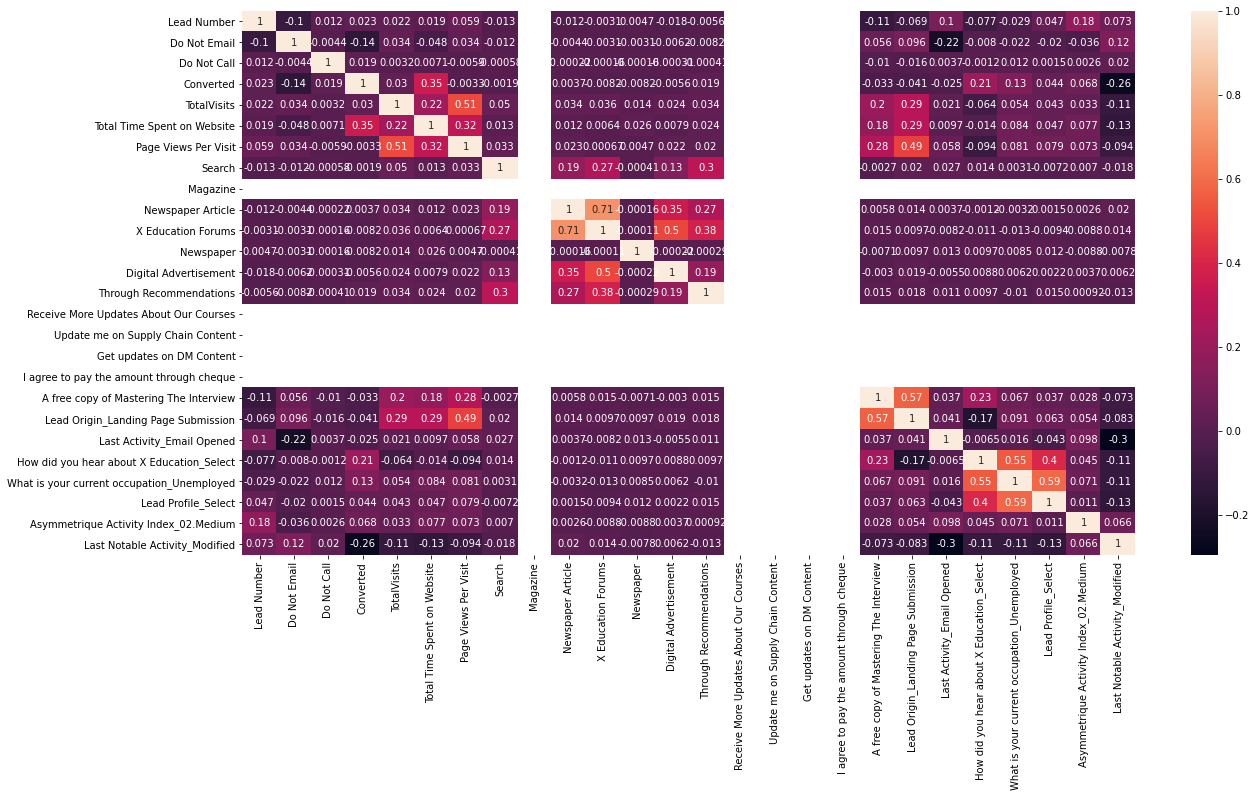

In [709]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

### Dropping empty correlated variables

In [710]:
X_test = X_test.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], 1)
X_train = X_train.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], 1)

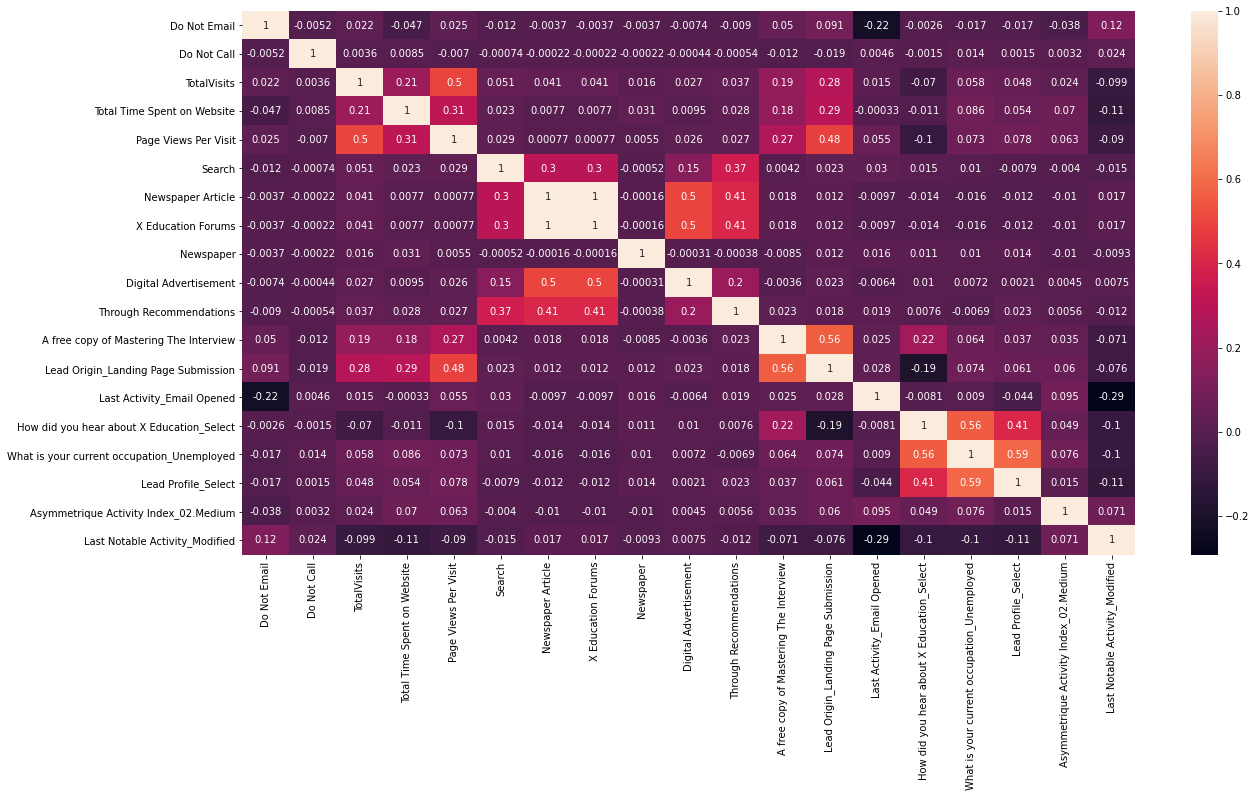

In [711]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## 7. Model building

### Running First Training Model

In [712]:
import statsmodels.api as sm

In [713]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3259.1
Date:                Sat, 19 Aug 2023   Deviance:                       6518.1
Time:                        22:38:31   Pearson chi2:                 6.61e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.2633      0.083     -3.178      0.001      -0.426      -0.101
Do Not Email                                  -1.3990      0.144     -9.688      0.000      -1.682      -1.116
Do Not Call                                   22.3881   2.06e+04      0.001      0.999   -4.03e+04    4.04e+04
TotalVisits                                    0.0696      0.043      1.628      0.104      -0.014       0.153
Total Time Spent on Website                    0.9560      0.035     26.993      0.000       0.887       1.025
Page Views Per Visit                          -0.2569      0.045     -5.745      0.000      -0.345      -0.169
Search                                        -1.2391      0.791     -1.567      0.117      -2.789       0.311
Newspaper Article                             -9.8378   1.46e+04     -0.001      0.999   -2.87e+04    2.86e+04
X Education Forums                            -9.8378   1.46e+04     -0.001      0.999   -2.87e+04    2.86e+04
Newspaper                                    -24.0416   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                         -1.2217      1.280     -0.955      0.340      -3.730       1.287
Through Recommendations                        2.2421      1.376      1.629      0.103      -0.455       4.939
A free copy of Mastering The Interview        -0.9320      0.094     -9.901      0.000      -1.116      -0.748
Lead Origin_Landing Page Submission            0.1551      0.094      1.648      0.099      -0.029       0.340
Last Activity_Email Opened                    -0.6417      0.067     -9.567      0.000      -0.773      -0.510
How did you hear about X Education_Select      1.4240      0.092     15.512      0.000       1.244       1.604
What is your current occupation_Unemployed    -0.0368      0.087     -0.423      0.672      -0.207       0.134
Lead Profile_Select                           -0.4714      0.074     -6.344      0.000      -0.617      -0.326
Asymmetrique Activity Index_02.Medium          0.3486      0.063      5.549      0.000       0.225       0.472
Last Notable Activity_Modified                -1.4267      0.073    -19.580      0.000      -1.570      -1.284
==============================================================================================================
"""

## 8. Feature selection using RFE

In [714]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [715]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [716]:
rfe.support_

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True])

In [717]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Newspaper Article', False, 3),
 ('X Education Forums', False, 2),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('How did you hear about X Education_Select', True, 1),
 ('What is your current occupation_Unemployed', False, 5),
 ('Lead Profile_Select', True, 1),
 ('Asymmetrique Activity Index_02.Medium', True, 1),
 ('Last Notable Activity_Modified', True, 1)]

In [718]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened',
       'How did you hear about X Education_Select', 'Lead Profile_Select',
       'Asymmetrique Activity Index_02.Medium',
       'Last Notable Activity_Modified'],
      dtype='object')

In [719]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Newspaper Article', 'X Education Forums',
       'What is your current occupation_Unemployed'],
      dtype='object')

### Assessing the model with StatsModels

In [720]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3261.0
Date:                Sat, 19 Aug 2023   Deviance:                       6522.0
Time:                        22:38:31   Pearson chi2:                 6.60e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2641      0.082     -3.213      0.001      -0.425      -0.103
Do Not Email                                 -1.3923      0.144     -9.644      0.000      -1.675      -1.109
Do Not Call                                  22.4053   2.06e+04      0.001      0.999   -4.04e+04    4.04e+04
Total Time Spent on Website                   0.9580      0.035     27.119      0.000       0.889       1.027
Page Views Per Visit                         -0.2256      0.040     -5.631      0.000      -0.304      -0.147
Search                                       -1.2385      0.788     -1.572      0.116      -2.783       0.306
Newspaper                                   -23.9590   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                        -1.3707      1.238     -1.107      0.268      -3.797       1.056
Through Recommendations                       2.1259      1.295      1.642      0.101      -0.412       4.664
A free copy of Mastering The Interview       -0.9137      0.092     -9.926      0.000      -1.094      -0.733
Lead Origin_Landing Page Submission           0.1471      0.092      1.598      0.110      -0.033       0.327
Last Activity_Email Opened                   -0.6456      0.067     -9.634      0.000      -0.777      -0.514
How did you hear about X Education_Select     1.3979      0.081     17.308      0.000       1.240       1.556
Lead Profile_Select                          -0.4812      0.068     -7.045      0.000      -0.615      -0.347
Asymmetrique Activity Index_02.Medium         0.3471      0.063      5.530      0.000       0.224       0.470
Last Notable Activity_Modified               -1.4346      0.073    -19.725      0.000      -1.577      -1.292
=============================================================================================================
"""

### Checking VIFs

In [721]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [722]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Origin_Landing Page Submission,3.51
11,How did you hear about X Education_Select,2.90
8,A free copy of Mastering The Interview,2.62
12,Lead Profile_Select,2.34
13,Asymmetrique Activity Index_02.Medium,1.70
10,Last Activity_Email Opened,1.56
14,Last Notable Activity_Modified,1.46
3,Page Views Per Visit,1.32
7,Through Recommendations,1.19
4,Search,1.17


### Dropping column have P>|z| > 0.05 (Train and check again)

In [723]:
# Let's drop TotalCharges
col = col.drop(['Do Not Call', 'Search', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Lead Origin_Landing Page Submission'])

In [724]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3269.7
Date:                Sat, 19 Aug 2023   Deviance:                       6539.5
Time:                        22:38:32   Pearson chi2:                 6.58e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.1963      0.069     -2.849      0.004      -0.331      -0.061
Do Not Email                                 -1.3707      0.144     -9.545      0.000      -1.652      -1.089
Total Time Spent on Website                   0.9618      0.035     27.479      0.000       0.893       1.030
Page Views Per Visit                         -0.2085      0.038     -5.542      0.000      -0.282      -0.135
A free copy of Mastering The Interview       -0.8180      0.074    -11.025      0.000      -0.963      -0.673
Last Activity_Email Opened                   -0.6445      0.067     -9.638      0.000      -0.776      -0.513
How did you hear about X Education_Select     1.3351      0.073     18.191      0.000       1.191       1.479
Lead Profile_Select                          -0.4568      0.067     -6.792      0.000      -0.589      -0.325
Asymmetrique Activity Index_02.Medium         0.3533      0.063      5.645      0.000       0.231       0.476
Last Notable Activity_Modified               -1.4317      0.073    -19.739      0.000      -1.574      -1.290
=============================================================================================================
"""

In [725]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,How did you hear about X Education_Select,2.71
6,Lead Profile_Select,2.08
3,A free copy of Mastering The Interview,1.66
7,Asymmetrique Activity Index_02.Medium,1.64
4,Last Activity_Email Opened,1.44
8,Last Notable Activity_Modified,1.38
2,Page Views Per Visit,1.24
1,Total Time Spent on Website,1.14
0,Do Not Email,1.12


In [726]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.92673011, 0.24152813, 0.09164304, 0.59677341, 0.46792478,
       0.18791491, 0.64734844, 0.15522736, 0.30596127, 0.65018324])

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [727]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
0,0,0.926730,7962
1,0,0.241528,5520
2,0,0.091643,1962
3,1,0.596773,1566
4,0,0.467925,9170


### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [728]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted
0,0,0.926730,7962,1
1,0,0.241528,5520,0
2,0,0.091643,1962,0
3,1,0.596773,1566,1
4,0,0.467925,9170,0


In [729]:
from sklearn import metrics

In [730]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3368  585]
 [ 956 1463]]


In [731]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        3368        585
# Converted            956        1463  

In [732]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7581607030759573


### Metrics beyond simply accuracy

In [733]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [734]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6047953699875982

In [735]:
# Let us calculate specificity
TN / float(TN+FP)

0.8520111307867443

In [736]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14798886921325574


In [737]:
# positive predictive value 
print (TP / float(TP+FP))

0.71435546875


In [738]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7789084181313598


## 9. Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [739]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [740]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

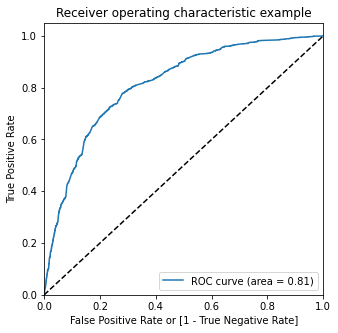

In [741]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## 10. Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [742]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.926730,7962,1,1,1,1,1,1,1,1,1,1,1
1,0,0.241528,5520,0,1,1,1,0,0,0,0,0,0,0
2,0,0.091643,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.596773,1566,1,1,1,1,1,1,1,0,0,0,0
4,0,0.467925,9170,0,1,1,1,1,1,0,0,0,0,0


In [743]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.514281  0.981811  0.228181
0.2   0.2  0.637790  0.923522  0.462940
0.3   0.3  0.710138  0.820587  0.642550
0.4   0.4  0.750628  0.712278  0.774096
0.5   0.5  0.758161  0.604795  0.852011
0.6   0.6  0.736974  0.464655  0.903618
0.7   0.7  0.706372  0.309632  0.949153
0.8   0.8  0.674043  0.184787  0.973438
0.9   0.9  0.637476  0.057462  0.992411


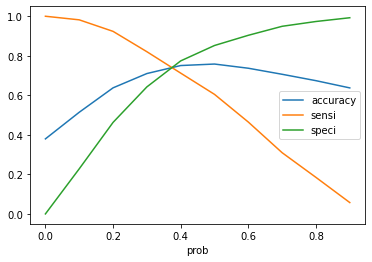

In [744]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [745]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.926730,7962,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.241528,5520,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.091643,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.596773,1566,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.467925,9170,0,1,1,1,1,1,0,0,0,0,0,1


In [746]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7471751412429378

In [747]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2997,  956],
       [ 655, 1764]], dtype=int64)

In [748]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [749]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.729226953286482

In [750]:
# Let us calculate specificity
TN / float(TN+FP)

0.7581583607386795

In [751]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.24184163926132052


In [752]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6485294117647059


In [753]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8206462212486308


### Precision and Recall

In [754]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3368,  585],
       [ 956, 1463]], dtype=int64)

In [755]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.71435546875

In [756]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6047953699875982

In [757]:
# Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score

In [758]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.71435546875

In [759]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6047953699875982

### Precision and recall tradeoff

In [760]:
from sklearn.metrics import precision_recall_curve

In [761]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    0
 6370    0
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [762]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

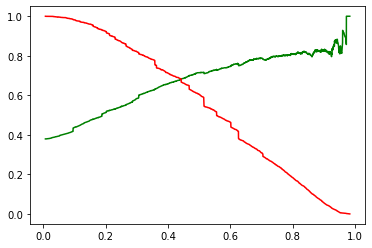

In [763]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 11. Making predictions on the test set

In [764]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [765]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Activity_Email Opened,How did you hear about X Education_Select,Lead Profile_Select,Asymmetrique Activity Index_02.Medium,Last Notable Activity_Modified
3504,0,-0.103815,0.289261,1,1,1,1,0,0
4050,0,-0.881052,-1.077404,0,0,1,0,0,0
7201,1,0.424120,-0.166294,1,0,1,1,0,0
1196,0,-0.105648,0.744816,1,1,1,1,1,0
8219,0,-0.428274,-0.280183,1,0,1,1,0,0


In [766]:
X_test_sm = sm.add_constant(X_test)

In [767]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.280760
4050    0.626228
7201    0.256523
1196    0.335351
8219    0.380009
8747    0.187915
9048    0.460844
6524    0.069506
7693    0.153561
8187    0.601706
dtype: float64

In [768]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
3504,0.280760
4050,0.626228
7201,0.256523
1196,0.335351
8219,0.380009


In [769]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [770]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [771]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [773]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

,Converted,ID,0
0,0,3504,0.280760
1,1,4050,0.626228
2,0,7201,0.256523
3,0,1196,0.335351
4,1,8219,0.380009
...,...,...,...
2726,0,6508,0.306130
2727,0,315,0.284108
2728,0,3766,0.159508
2729,1,8043,0.791414


In [775]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,ID,Converted_Prob
0,0,3504,0.280760
1,1,4050,0.626228
2,0,7201,0.256523
3,0,1196,0.335351
4,1,8219,0.380009


In [778]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,ID,Converted_Prob,final_predicted
0,0,3504,0.280760,0
1,1,4050,0.626228,1
2,0,7201,0.256523,0
3,0,1196,0.335351,0
4,1,8219,0.380009,0


In [780]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7696814353716588

In [782]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1358,  331],
       [ 298,  744]], dtype=int64)

In [783]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [784]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7140115163147792

In [785]:
# Let us calculate specificity
TN / float(TN+FP)

0.8040260509177027